In [1]:
from bs4 import BeautifulSoup
import requests

# Tabelle generieren

In [2]:
url = 'https://www.kicker.de/bundesliga/tabelle/2023-24'
page = requests.get(url) #200 is fine
soup = BeautifulSoup(page.text, 'html')
table = soup.find('table', class_='kick__table kick__table--ranking kick__table--alternate kick__table--resptabelle')
#df = pd.read_html(url)[0]

# get titles
titles = table.find_all('th')
titles = [t.text.strip() for t in titles] #list comprehension
titles

# read in data
import pandas as pd
df = pd.DataFrame(columns = titles) 
col_data = table.find_all('tr')
for row in col_data[1:]:
        row_data = row.find_all('td')
        ind_row_data = [r.text.strip() for r in row_data]
        
        #insert in dataframe
        length = len(df)
        df.loc[length] = ind_row_data

# clean data
df.rename(columns={'Pl.': 'Platz', 'Sp.': 'Spiele','ss-u-n': 'S', 'Diff.': 'Diff'}, inplace=True)
df['Platz'] = df['Platz'].astype(int)
df.set_index('Platz', inplace=True)
df = df.drop('', axis=1)
df['Team'] = df['Team'].str.split('\n').str[1].replace(r'\([^)]*\)', '', regex=True).str.strip()
df['S'] = df['S'].str.split('\n').str[1].astype(int)
df['G'] = df['Tore'].str.split(':').str[0].astype(int)
df['A'] = df['Tore'].str.split(':').str[1].astype(int)

df['Spiele'] = df['Spiele'].astype(int)
df['U'] = df['U'].astype(int)
df['N'] = df['N'].astype(int)
df['Diff'] = df['Diff'].astype(int)
df['Punkte'] = df['Punkte'].astype(int)
df['U'] = df['U'].astype(int)


df.insert(6, 'G', df.pop('G'))
df.insert(7, 'A', df.pop('A'))


# add P/G
df['ØP'] = (df['Punkte'] / df['Spiele']).round(2)

# add urls
teams_url23 = ['1-fc-heidenheim','1-fc-koeln', '1-fc-union-berlin', '1-fsv-mainz-05', 'bayer-04-leverkusen', 'fc-bayern-muenchen',
            'bor-moenchengladbach', 'borussia-dortmund', 'eintracht-frankfurt', 'fc-augsburg', 'rb-leipzig', 'sc-freiburg',
            'sv-darmstadt-98', 'tsg-hoffenheim', 'vfb-stuttgart', 'vfl-bochum', 'vfl-wolfsburg', 'werder-bremen']

teams_url22 = ['1-fc-koeln', '1-fc-union-berlin', '1-fsv-mainz-05', 'bayer-04-leverkusen', 'fc-bayern-muenchen',
            'bor-moenchengladbach', 'borussia-dortmund', 'eintracht-frankfurt', 'fc-augsburg', 'fc-schalke-04', 'hertha-bsc', 'rb-leipzig', 'sc-freiburg', 
            'tsg-hoffenheim', 'vfb-stuttgart', 'vfl-bochum', 'vfl-wolfsburg', 'werder-bremen']
df = df.sort_values('Team')
df['url'] = teams_url23
df['url'] = df['url'].astype(str)
df = df.sort_index()


#save to csv
df.to_csv(r'/Users/enricokoegler/Desktop/Data Analysis Bootcamp/Python/Bundesliga/bundesliga.csv', index=True)
soup = BeautifulSoup(df.to_html(), 'html.parser')#.prettify()

with open('/Users/enricokoegler/Desktop/Data Analysis Bootcamp/Python/Bundesliga/bundesliga.html', 'w') as file:
    file.write(df.to_html())
    #file.write(soup)
df

,Team,Spiele,S,U,N,Tore,G,A,Diff,Punkte,ØP,url
Platz,,,,,,,,,,,,
1,Bayer 04 Leverkusen,20,16,4,0,52:14,52,14,38,52,2.60,bayer-04-leverkusen
2,Bayern München,20,16,2,2,59:19,59,19,40,50,2.50,fc-bayern-muenchen
3,VfB Stuttgart,20,13,1,6,46:26,46,26,20,40,2.00,vfb-stuttgart
4,Borussia Dortmund,20,10,7,3,40:26,40,26,14,37,1.85,borussia-dortmund
5,RB Leipzig,20,11,3,6,44:26,44,26,18,36,1.80,rb-leipzig
6,Eintracht Frankfurt,20,8,7,5,30:24,30,24,6,31,1.55,eintracht-frankfurt
7,SC Freiburg,20,8,4,8,26:34,26,34,-8,28,1.40,sc-freiburg
8,TSG Hoffenheim,20,7,5,8,37:39,37,39,-2,26,1.30,tsg-hoffenheim
9,Werder Bremen,20,7,5,8,29:32,29,32,-3,26,1.30,werder-bremen


# Gegnerlisten generieren

In [3]:
from pprint import pprint

teams = set(df['Team'])
teams_schedule = {}
for t in teams:
    opponents = []
    url = 'https://www.kicker.de/' + df[df['Team'] == t]['url'].values[0] + '/spielplan/bundesliga/2023-24'
    page = requests.get(url) #200 is fine
    soup = BeautifulSoup(page.text, 'html')
    game_data = soup.find_all('tr')
    
    for g in game_data:
        if 'BL' in g.text:
            x = g.find_all('div', class_='kick__v100-gameCell__team__name')
            for o in x:
                if o.text.strip() != t:
                    opponents.append(o.text.strip())
    teams_schedule[t] = opponents[:34]    
    
#pprint(teams_schedule)

# Gegner Durchschnittspunkte

In [4]:
df['Gegner'] = ''

for t in teams:
    anzahl_spiele = df[df['Team'] == t]['Spiele'].values[0]
    opp = teams_schedule[t][:anzahl_spiele]
    n = -3 * df[df['Team'] == t]['N'].values[0] - 1 * df[df['Team'] == t]['U'].values[0]
    m = 0
    for o in opp:
        n += float(df[df['Team'] == o]['Punkte'].values[0])
        m += df[df['Team'] == o].index[0]
        #print(o, df[df['Team'] == o]['ØP'].values[0], n)
    df.loc[df['Team'] == t, 'Gegner'] = (m / anzahl_spiele).round(2)
df.sort_values('Gegner')


,Team,Spiele,S,U,N,Tore,G,A,Diff,Punkte,ØP,url,Gegner
Platz,,,,,,,,,,,,,
13,Bor. Mönchengladbach,20,5,6,9,36:41,36,41,-5,21,1.05,bor-moenchengladbach,8.65
18,SV Darmstadt 98,20,2,5,13,22:49,22,49,-27,11,0.55,sv-darmstadt-98,8.75
16,1. FC Köln,20,3,6,11,14:34,14,34,-20,15,0.75,1-fc-koeln,8.8
14,VfL Bochum,20,4,9,7,22:38,22,38,-16,21,1.05,vfl-bochum,8.8
17,1. FSV Mainz 05,19,1,8,10,14:31,14,31,-17,11,0.58,1-fsv-mainz-05,8.89
7,SC Freiburg,20,8,4,8,26:34,26,34,-8,28,1.40,sc-freiburg,9.2
10,1. FC Heidenheim,20,6,6,8,28:35,28,35,-7,24,1.20,1-fc-heidenheim,9.2
5,RB Leipzig,20,11,3,6,44:26,44,26,18,36,1.80,rb-leipzig,9.25
12,FC Augsburg,20,5,7,8,29:37,29,37,-8,22,1.10,fc-augsburg,9.4


# Lineare Regression

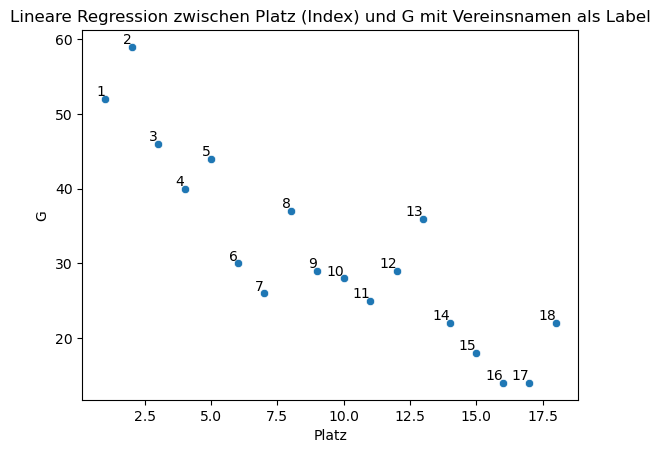

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

df_reg = df.copy()
df_reg.sort_values('G', ascending=False)
rank = 1;
df_reg['Rang G'] = df_reg['G'].rank(ascending=False).astype(int)

x = df_reg[['Team', 'G']]


ax = sns.scatterplot(x=df.index, y='G', data=df_reg)

# Jeden Punkt beschriften
for team, x, y in zip(df_reg.index, df_reg.index, df_reg['G']):
    ax.text(x, y, team, ha='right', va='bottom')

# Diagramm anzeigen
plt.title('Lineare Regression zwischen Platz (Index) und G mit Vereinsnamen als Label')
plt.xlabel('Platz')
plt.ylabel('G')
plt.show()

# Gehaltsliste

In [6]:
url = 'https://fbref.com/de/wettbewerbe/20/wages/Bundesliga-Gehalter'
df = pd.read_html(url)[0]
df.set_index('Rg', inplace=True)
df['Wochengehälter'] = df['Wochengehälter'].str.split('(').str[0].str.split().str[1].str.replace('.', '').astype(int)
df['Jahresgehälter'] = df['Jahresgehälter'].str.split('(').str[0].str.split().str[1].str.replace('.', '').astype(int)
#df.rename(columns={'Pl.': 'Platz', 'Sp.': 'Spiele','ss-u-n': 'S', 'Diff.': 'Diff',})
df.to_csv(r'/Users/enricokoegler/Desktop/Data Analysis Bootcamp/Python/Bundesliga/bundesliga_gehalt.csv', index=True)
df

,Verein,# Sp,Wochengehälter,Jahresgehälter,Schätzwert in %
Rg,,,,,
1,Bayern Munich,49,4948462,257320000,16%
2,Dortmund,57,2434615,126600000,38%
3,RB Leipzig,51,1943077,101040000,65%
4,Leverkusen,49,1199423,62370000,73%
5,Wolfsburg,56,1054423,54830000,96%
6,M'Gladbach,60,990000,51480000,89%
7,Hoffenheim,54,934423,48590000,100%
8,Eint Frankfurt,62,698654,36330000,71%
9,Union Berlin,53,673462,35020000,96%
